In [1]:
#define all relevant functions
import numpy as np
import pandas as pd
from scipy.fft import fftn, ifftn, fftshift
import re

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def get_data(model, U,mu, nk, nkf):
    '''
    reads a FRG output text file
    and returns the number of k1 and k2 points used, as well as the data for all three action channels

    '''
  


    df = pd.read_csv(model + "_" + f"{U}" +"_"+ f"{mu}" + "_" +f"{nk}" +"_" + f"{nkf}" +".txt", delimiter="\t", header = None, skiprows = 1) 

    r = df.iloc[-1, 0]
    n = r.split()

    tc, sc, mag, cdw, _ = map(float, n)

    

    if tc <= 1e-6:  # Check if Tc is in the order of magnitude of 10^-6 or smaller
        dominant = 3
    else:
        orders = [sc, mag, cdw]
        o_max = max(orders)
        dominant = orders.index(o_max)
    
    return tc, sc, mag, cdw, dominant

    


def plots(model, nk, nkf, Us, mus, figna, fignb):

    X, Y = np.meshgrid(mus, Us)
    u_size = len(Us)
    mu_size = len(mus)
    Tcs = np.zeros((u_size,mu_size))
    dom = np.zeros((u_size,mu_size))

    for i, u in enumerate(Us):
        for j, mu in enumerate(mus):
        
            Tcs[i][j] = get_data(model,u,mu, nk, nkf)[0]
            dom[i][j] = get_data(model,u, mu, nk, nkf)[4]

    #plot tc


    fig, ax = plt.subplots(figsize=(16, 6))

    #ax.set_aspect('equal')
    ax.grid()
    C = ax.contourf(X, Y, Tcs,  levels = 50, cmap = 'coolwarm', linewidths=1.5)
    fig.colorbar(C, ax=ax, orientation='vertical')

    ax.set_title(f"Fig.{figna}.{fignb}.a 2NN Tc as a function of  U and $\mu$ for nk= {nk} and nkf= {nkf}")
    ax.set_ylabel("U")
    ax.set_xlabel(r"$\mu$")



    colors = ['blue', 'green', 'yellow', 'black']  
    labels = ['SC', 'MAG', 'CDW', 'FL']
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(np.arange(-0.5, 3.5, 1), cmap.N)


    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X, Y, c=dom, cmap=cmap, norm=norm, s=30, marker = 'x')


    plt.ylabel('U')
    plt.xlabel(r'$\mu$')
    plt.title(f'Fig {figna}.{fignb}.b {model} Phase diagram as a function of U and $\mu$ for nk= {nk} and nkf= {nkf}')

    legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
    plt.legend(handles=legend_patches, title="Phases", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()





In [2]:
U = [0,1,2,3,4,5,6,7]
mu= [0, 0.25, 0.5, 1]



/tmp/ipykernel_2942/3522412982.py:63: UserWarning: linewidths is ignored by contourf
  C = ax.contourf(X, Y, Tcs,  levels = 50, cmap = 'coolwarm', linewidths=1.5)


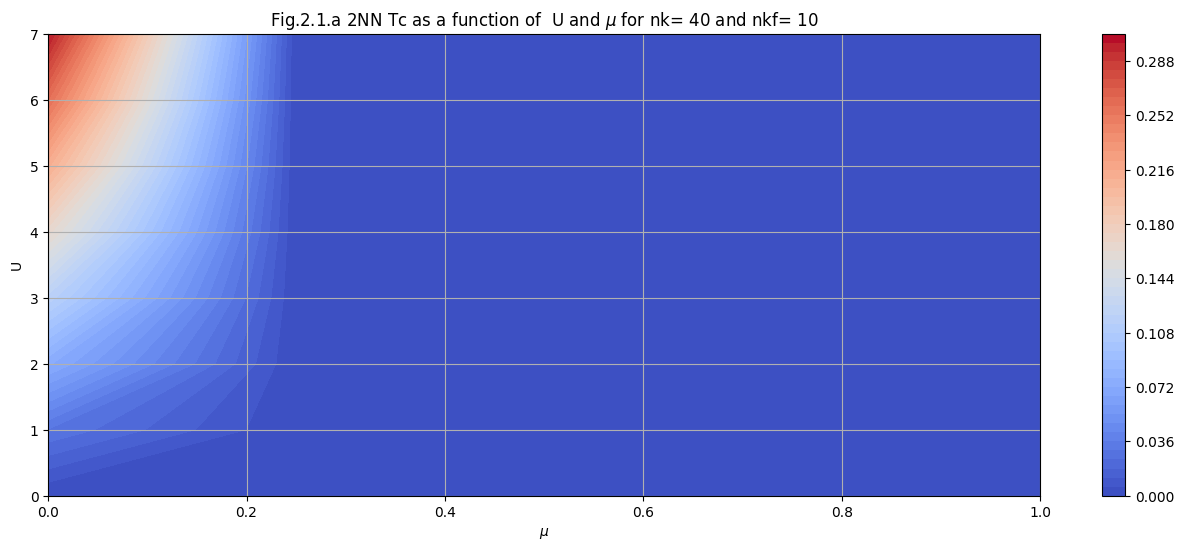

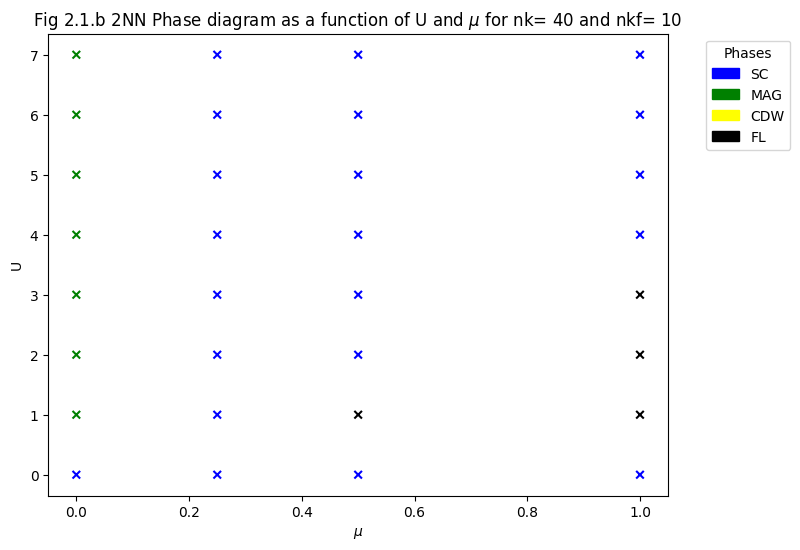

In [3]:
plots(model="2NN",nk=40, nkf=10,Us=U, mus=mu, figna= 2, fignb=1)

In [4]:
# mu= 0-1 in steps of 0.1
# U = 0-8 in steps of 0.25
# nk = 20
# nkf = 5


Us2 = np.arange(0,8.35, 0.25)
mus2 =  np.arange(0.0,1.0, 0.1)
Us2_str = np.array([f"{x:.2f}" for x in Us2])
mus2_str = [str(x) for x in mus2]

def plots(model, nk, nkf, Us, mus, figna, fignb):

    X, Y = np.meshgrid(mus, Us)
    u_size = len(Us)
    mu_size = len(mus)
    Tcs = np.zeros((u_size,mu_size))
    dom = np.zeros((u_size,mu_size))

    for i, u in enumerate(Us):
        for j, mu in enumerate(mus):
        
            Tcs[i][j] = get_data(model,u,mu, nk, nkf)[0]
            dom[i][j] = get_data(model,u, mu, nk, nkf)[4]

    #plot tc


    fig, ax = plt.subplots(figsize=(16, 6))

    #ax.set_aspect('equal')
    ax.grid()
    C = ax.contourf(X, Y, Tcs,  levels = 50, cmap = 'coolwarm', linewidths=1.5)
    fig.colorbar(C, ax=ax, orientation='vertical')

    ax.set_title(f"Fig.{figna}.{fignb}.a 2NN Tc as a function of  U and $\mu$ for nk= {nk} and nkf= {nkf}")
    ax.set_ylabel("U")
    ax.set_xlabel(r"$\mu$")



    colors = ['blue', 'green', 'yellow', 'black']  
    labels = ['SC', 'MAG', 'CDW', 'FL']
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(np.arange(-0.5, 3.5, 1), cmap.N)


    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X, Y, c=dom, cmap=cmap, norm=norm, s=30, marker = 'x')


    plt.ylabel('U')
    plt.xlabel(r'$\mu$')
    plt.title(f'Fig {figna}.{fignb}.b {model} Phase diagram as a function of U and $\mu$ for nk= {nk} and nkf= {nkf}')

    legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
    plt.legend(handles=legend_patches, title="Phases", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


In [5]:
def get_data2(model, U,mu, nk, nkf):
    '''
    reads a FRG output text file
    and returns the number of k1 and k2 points used, as well as the data for all three action channels

    '''
  


    df = pd.read_csv(model + "_" + U +"_"+ mu + "_" +f"{nk}" +"_" + f"{nkf}" +".txt", delimiter="\t", header = None, skiprows = 1) 

    r = df.iloc[-1, 0]
    n = r.split()

    tc, sc, mag, cdw, _ = map(float, n)

    
    if sc <= 1e-02 and  mag  <= 1e-02 and cdw <= 1e-02:  # Check if Tc is in the order of magnitude of 10^-6 or smaller
        dominant = 3

    else:
        orders = [sc, mag, cdw]
        o_max = max(orders)
        dominant = orders.index(o_max)
    
    
    return tc, sc, mag, cdw, dominant




def plots(model, nk, nkf, Us, Us_str, mus, mus_str, figna, fignb):

    X, Y = np.meshgrid(mus, Us)
    u_size = len(Us)
    mu_size = len(mus)
    Tcs = np.zeros((u_size,mu_size))
    dom = np.zeros((u_size,mu_size))

    for i, u in enumerate(Us_str):
        for j, mu in enumerate(mus_str):

        
            
            Tcs[i][j] = get_data2(model,u,mu, nk, nkf)[0]
            dom[i][j] = get_data2(model,u, mu, nk, nkf)[4]

    #plot tc


    fig, ax = plt.subplots(figsize=(16, 6))

    #ax.set_aspect('equal')
    ax.grid()
    C = ax.contourf(X, Y, Tcs,  levels = 50, cmap = 'coolwarm', linewidths=1.5)
    fig.colorbar(C, ax=ax, orientation='vertical')

    ax.set_title(f"Fig.{figna}.{fignb}.a 2NN Tc as a function of  U and $\mu$ for nk= {nk} and nkf= {nkf}")
    ax.set_ylabel("U")
    ax.set_xlabel(r"$\mu$")



    colors = ['blue', 'green', 'yellow', 'black']  
    labels = ['SC', 'MAG', 'CDW', 'FL']
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(np.arange(-0.5, 3.5, 1), cmap.N)


    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X, Y, c=dom, cmap=cmap, norm=norm, s=50, marker = 'x')


    plt.ylabel('U')
    plt.xlabel(r'$\mu$')
    plt.title(f'Fig {figna}.{fignb}.b {model} Phase diagram as a function of U and $\mu$ for nk= {nk} and nkf= {nkf}')

    legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
    plt.legend(handles=legend_patches, title="Phases", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    


In [10]:
Us2 = np.arange(0, 8, 0.25)
mus2 = np.arange(0.0, 1.1, 0.1)

Us2_str = [f"{x:.2f}" for x in Us2]
mus2_str = [f"{x:.1f}" for x in mus2]




/tmp/ipykernel_2942/3881781558.py:55: UserWarning: linewidths is ignored by contourf
  C = ax.contourf(X, Y, Tcs,  levels = 50, cmap = 'coolwarm', linewidths=1.5)


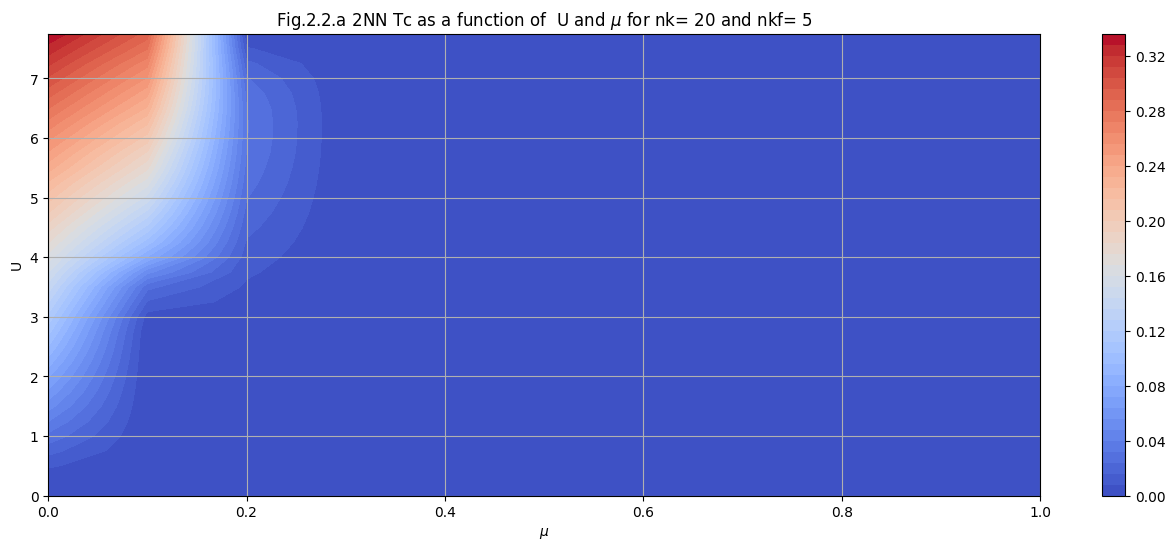

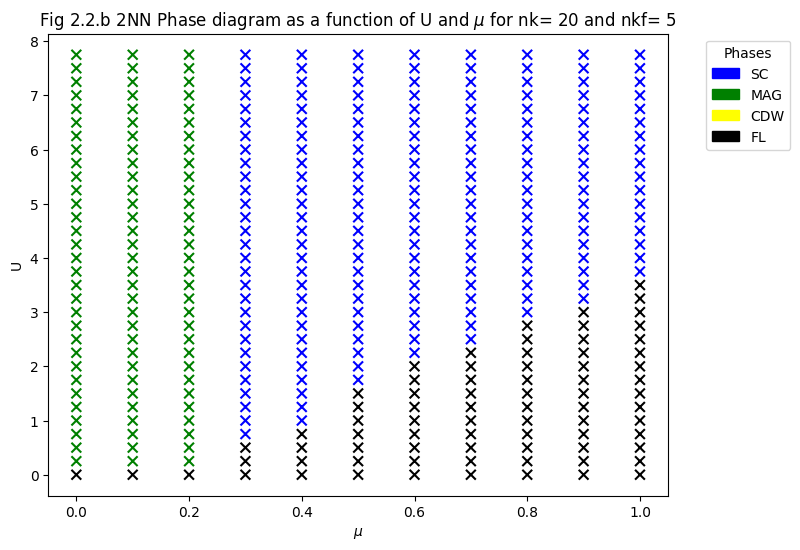

In [12]:
plots(model= "2NN", nk =20, nkf =5, Us = Us2, Us_str = Us2_str, mus= mus2, mus_str= mus2_str, figna = 2, fignb=2)


In [92]:
get_data2("2NN", "0.00", "0.0", 20,5 )

(9.01759e-06, 0.0, 0.0, 0.0, 3)

In [22]:
Us3 = np.arange(0, 8, 0.25)
mus3 = np.arange(0.0, 1.1 , 0.1)

Us3_str = [f"{x:.2f}" for x in Us3]
mus3_str = [f"{x:.1f}" for x in mus3]

print(mus3_str)

['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']


#2NN model, where the lattice and spacing does match that  (1.22 in file report)

/tmp/ipykernel_2942/3195781660.py:24: UserWarning: linewidths is ignored by contourf
  C = ax.contourf(X, Y, Tcs,  levels = 50, cmap = 'coolwarm', linewidths=1.5)


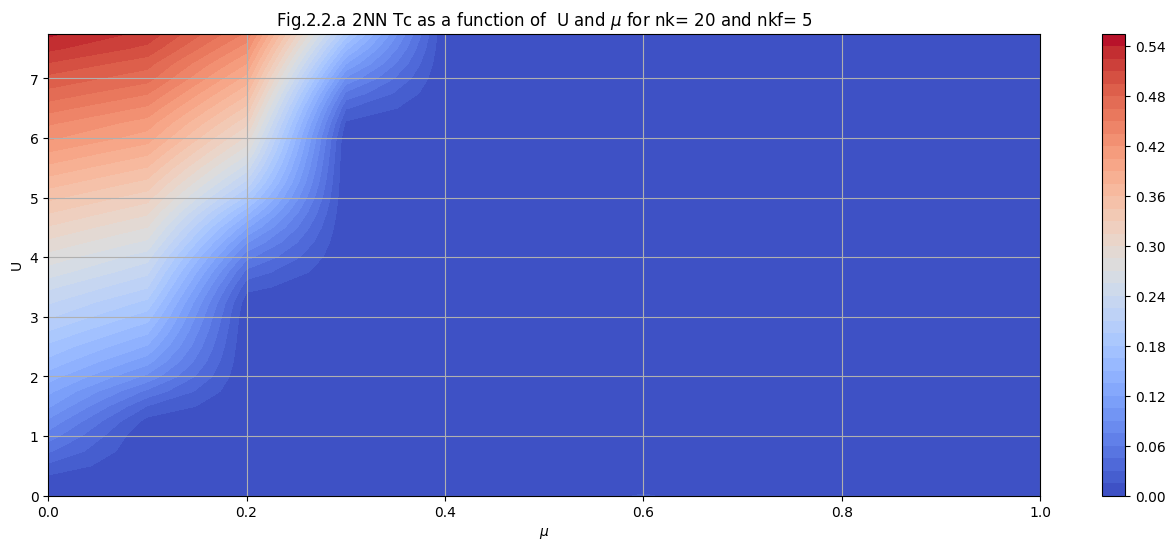

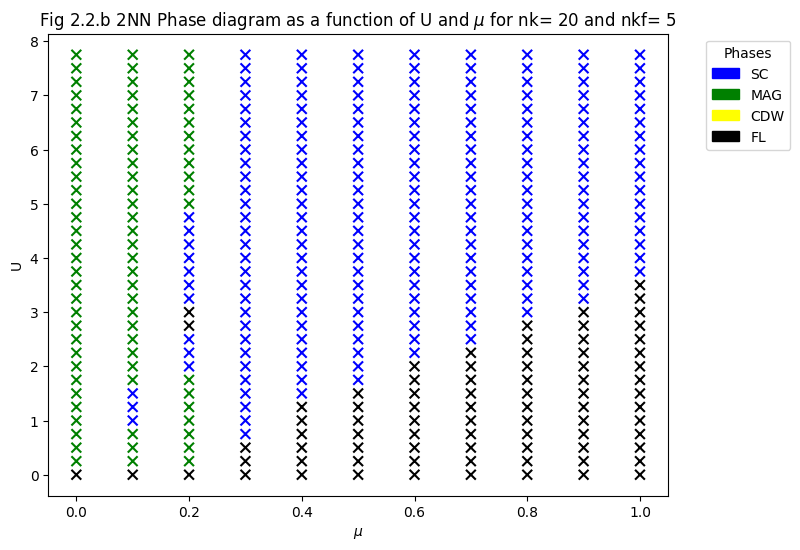

In [ ]:
plots(model= "2NN", nk =20, nkf =5, Us = Us3, Us_str = Us3_str, mus= mus3, mus_str= mus3_str, figna = 2, fignb=2)

In [100]:
get_data2("2NNa", "0.00", "0.3", 20, 5)

(9.01759e-06, 0.0, 0.0, 0.0, 3)

In [13]:
def get_data3(model, U,mu, nk, nkf):
    '''
    reads a FRG output text file
    and returns the number of k1 and k2 points used, as well as the data for all three action channels

    '''
  


    df = pd.read_csv(model + "_" + U +"_"+ mu + "_" +f"{nk}" +"_" + f"{nkf}" +".out", delimiter="\t", header = None, skiprows = 1) 

    r = df.iloc[-1, 0]
    n = r.split()

    tc, sc, mag, cdw, _ = map(float, n)

    
    if sc <= 1e-02 and  mag  <= 1e-02 and cdw <= 1e-02:  # Check if Tc is in the order of magnitude of 10^-6 or smaller
        dominant = 3

    else:
        orders = [sc, mag, cdw]
        o_max = max(orders)
        dominant = orders.index(o_max)
    
    
    return tc, sc, mag, cdw, dominant


In [15]:


def plots3(model, nk, nkf, Us, Us_str, mus, mus_str, figna, fignb):

    X, Y = np.meshgrid(mus, Us)
    u_size = len(Us)
    mu_size = len(mus)
    Tcs = np.zeros((u_size,mu_size))
    dom = np.zeros((u_size,mu_size))

    for i, u in enumerate(Us_str):
        for j, mu in enumerate(mus_str):

        
            
            Tcs[i][j] = get_data3(model,u,mu, nk, nkf)[0]
            dom[i][j] = get_data3(model,u, mu, nk, nkf)[4]

    #plot tc


    fig, ax = plt.subplots(figsize=(16, 6))

    #ax.set_aspect('equal')
    ax.grid()
    C = ax.contourf(X, Y, Tcs,  levels = 50, cmap = 'coolwarm', linewidths=1.5)
    fig.colorbar(C, ax=ax, orientation='vertical')

    ax.set_title(f"Fig.{figna}.{fignb}.a 2NN Tc as a function of  U and $\mu$ for nk= {nk} and nkf= {nkf}")
    ax.set_ylabel("U")
    ax.set_xlabel(r"$\mu$")



    colors = ['blue', 'green', 'yellow', 'black']  
    labels = ['SC', 'MAG', 'CDW', 'FL']
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(np.arange(-0.5, 3.5, 1), cmap.N)


    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X, Y, c=dom, cmap=cmap, norm=norm, s=50, marker = 'x')


    plt.ylabel('U')
    plt.xlabel(r'$\mu$')
    plt.title(f'Fig {figna}.{fignb}.b {model} Phase diagram as a function of U and $\mu$ for nk= {nk} and nkf= {nkf}')

    legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
    plt.legend(handles=legend_patches, title="Phases", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

/tmp/ipykernel_2942/3129765458.py:24: UserWarning: linewidths is ignored by contourf
  C = ax.contourf(X, Y, Tcs,  levels = 50, cmap = 'coolwarm', linewidths=1.5)


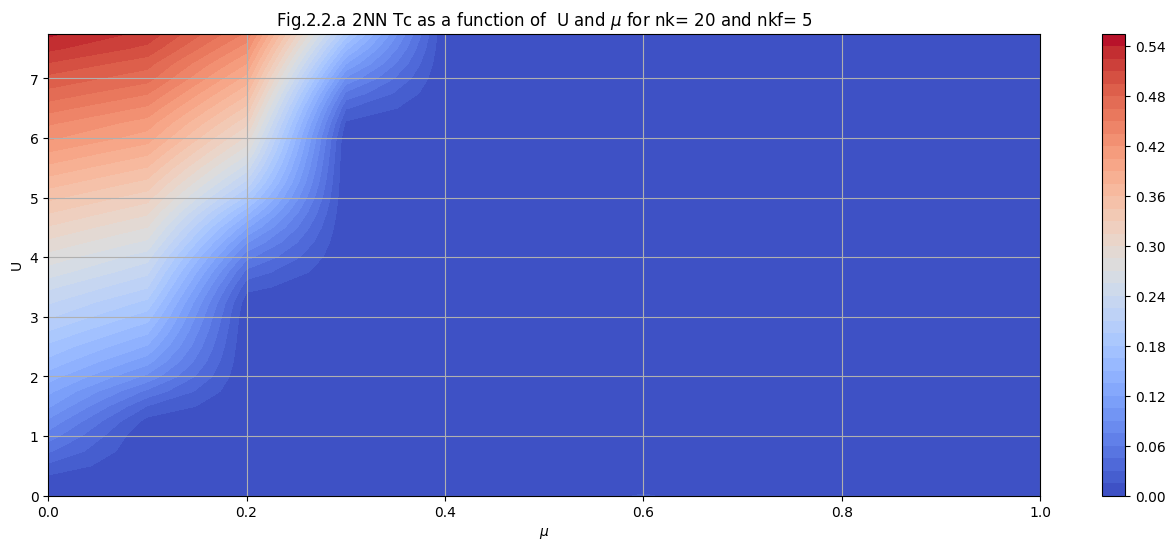

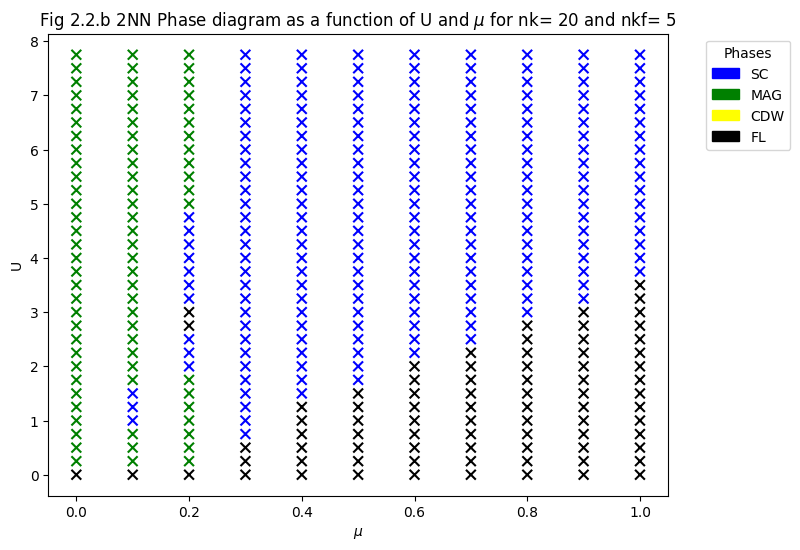

In [24]:
plots3(model= "2NN", nk =20, nkf =5, Us = Us3, Us_str = Us3_str, mus= mus3, mus_str= mus3_str, figna = 2, fignb=2)

2NNb.log output.pdf PYTHON /home/oem/Documents/Final year project/Test models/2NN


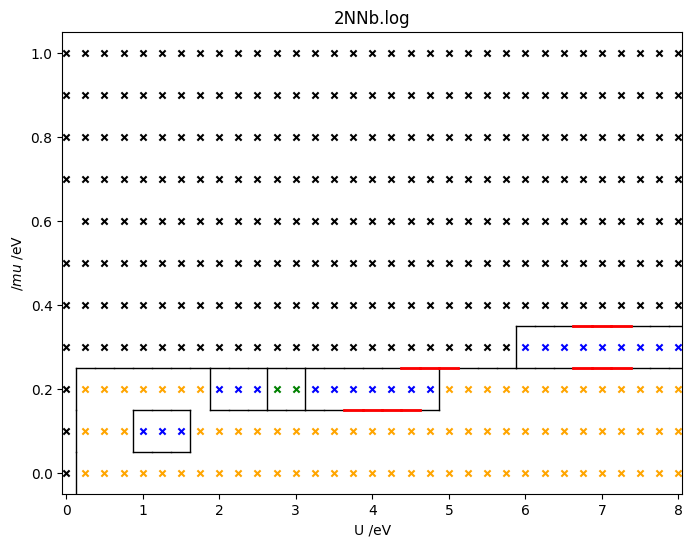

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
#from scipy.spatial import ConvexHull
from scipy.spatial import Voronoi, voronoi_plot_2d


#change to directory of current script


#import matplotlib.tri as tri
#from matplotlib.colors import ListedColormap

#change to directory of current script
#os.chdir(os.path.dirname(os.path.abspath(__file__)))

def read_data(file_name):
    #This is specifically for a data file i made for this calculation. not standardised.
    f = open(file_name, 'r')
    data = []
    for line in f:
        l = line.split()

        if len(l) != 4:
            continue
        else:

            file= l[0].split("/")[-1].split("_") #first entry should be 'Sr2RuO4_U_J_nk_nkf.out'
            U = float(file[1])
            J = float(file[2])
            nk = int(file[3])
            nkf = int(file[4].split(".")[0])

            time= l[3].split("m")
            seconds = float(time[0])*60 + float(time[1].split("s")[0])
            final_data = [U, J, nk, nkf,l[1],float(l[2]),seconds] 
            data.append(final_data)

    return data

def plot_U_J_Voronoi(data,inputname,outputname):
    print(inputname,outputname,"PYTHON",os.getcwd())
    # Triangular grid
    kb_ev = 8.6173303e-5 #eV
    x = []  
    y = []
    groundstate = []
    points = []
    z = []
    for d in data:
        x.append(d[0])
        y.append(d[1])
        points.append([d[0],d[1]])
        groundstate.append(d[4])
        z.append((d[5])/kb_ev)
    
    #convert ground_State to numbers
    groundstate_num = []
    for i in range(len(groundstate)):
        if groundstate[i] == "FL":
            groundstate_num.append(0)
        elif groundstate[i] == "SC":
            groundstate_num.append(1)
        elif groundstate[i] == "SDW":
            groundstate_num.append(2)
        elif groundstate[i] == "CDW":
            groundstate_num.append(3)
        else:
            groundstate_num.append(-1)

    max_U = max(x)
    min_U = min(x)
    max_J = max(y)
    min_J = min(y)

    #Add in boundaries
    for i in np.linspace(min_U,max_U,201):
        points.append([i,min_J-1])
        groundstate.append("Empty")
        groundstate_num.append(-1) 
    
    for i in np.linspace(min_J,max_J,201):
        points.append([min_U-1,i])
        groundstate.append("Empty")
        groundstate_num.append(-1)

    for i in np.linspace(min_U,max_U,201):
        points.append([i,max_J+1])
        groundstate.append("Empty")
        groundstate_num.append(-1) 
    
    for i in np.linspace(min_J,max_J,201):
        points.append([max_U+1,i])
        groundstate.append("Empty")
        groundstate_num.append(-1)


    points = np.array(points)
    categories = np.array(groundstate_num)  # Random categories (0, 1, 2, 3)
    
    # Compute Voronoi diagram
    vor = Voronoi(points)

    # Plot Voronoi diagram
        # Set background colors
    fig, ax = plt.subplots(figsize=(8, 6))
    #fig.patch.set_facecolor('black')  # Set figure background
    #ax.set_facecolor('white')         # Set axes background
    #voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', line_width=0.0, show_points=False)

    # Highlight points with categories
    for i in range(len(x)):
        if groundstate[i] == "SC":
            colour = 'blue'
        elif groundstate[i] == "CDW":
            colour = 'green'
        elif groundstate[i] == "FL":
            colour="black"
        elif groundstate[i] == "SDW":
            colour="orange"
        else:
            colour="white"
        ax.scatter(x[i], y[i], c=colour, s=20,marker="x")


    # Identify boundaries between different categories
    f = open(outputname,"w")

    lines = []
    line_magnitudes = []
    # Identify boundaries between different categories, calculate their magnitudes
    for ridge, (p1, p2) in zip(vor.ridge_vertices, vor.ridge_points):
        if ridge[0] == -1 or ridge[1] == -1:  # Skip infinite ridges
            continue
        if categories[p1] != categories[p2]:  # Different categories
            line = vor.vertices[ridge] ##[[x_start,y_start],[x_end,y_end]]
            lines.append(line)
            line_magnitudes.append(np.sqrt((line[1][0]-line[0][0])**2 + (line[1][1]-line[0][1])**2))
            ax.plot(line[:, 0], line[:, 1], 'black', linewidth=1)
    
    # Sort lines by their length
    sorted_lines = sorted(lines, key=lambda line: ((line[1][0] - line[0][0])**2 + (line[1][1] - line[0][1])**2)**0.5)
    sorted_lines = sorted_lines[::-1] #this puts longest lines first

    filtered_lines = []
    for line in sorted_lines:
        if ((min_U <line[0][0] < max_U) and (min_J < line[0][1] < max_J) and (min_U <line[1][0] < max_U) and (min_J < line[1][1] < max_J)):
            filtered_lines.append(line)
            

    
    #print(len(sorted_lines))
    #save the start, end and mid point of the Voronoi line.
    for i in range(int(len(filtered_lines)/5)): #take 10% of the longest lines and write those into the list. 
            x = (filtered_lines[i][0, 0] + filtered_lines[i][1, 0])/2.0
            y = (filtered_lines[i][0, 1] + filtered_lines[i][1, 1])/2.0
            ax.plot(filtered_lines[i][:, 0], filtered_lines[i][:, 1], 'r-', linewidth=2)
            f.write(f"{np.round(x,3)} {np.round(y,3)}\n")
	    #if x > 0 and y > 0:
            #    f.write(f"{np.round(x,3)} {np.round(y,3)}\n")
            #x = sorted_lines[i][0,0]
            #y = sorted_lines[i][0,1]
            #if x > 0 and y > 0:
            #    f.write(f"{np.round(x,3)} {np.round(y,3)}\n")
            #x = sorted_lines[i][1,0]
            #y = sorted_lines[i][1,1]
            #if x > 0 and y > 0:
            #    f.write(f"{np.round(x,3)} {np.round(y,3)}\n")
    f.close()

    # Plot settings
    #ax.set_title(f"{inputname}")
    ax.set_xlim(-0.05, 8.05)
    ax.set_ylim(-0.05, 1.05)
    plt.xlabel("U /eV")
    plt.ylabel(f"$/mu$ /eV")

    #plt.savefig(f"{inputname}.png")
    #plt.savefig(f"{inputname}.pdf")
    plt.show()

def main():
    
    inputname = f'2NNb.log'
    outputname = "output.pdf"
    data = read_data(inputname)
    plot_U_J_Voronoi(data,inputname,outputname)

if __name__ == "__main__":
    main()